# Covid-19 tracker - Cases, Mortality and Vaccinations

This small prototype project is to build a webscraper capable of gathering info on the current covid-19 pandemic, and map hotzones within countries. I'll potentially be making a nice GUI for this if it works well

In [125]:
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
import requests
import numpy as np
import pandas as pd

## Webscraping for covid-19 data using beautifulsoup.


In [126]:
# worldwide data https://www.worldometers.info/coronavirus/
# uk tracker - inc. data https://coronavirus.data.gov.uk/details/vaccinations

url = "https://www.worldometers.info/coronavirus/"
htmlContent = requests.get(url).text

soup = BeautifulSoup(htmlContent, 'html.parser')
covidTable = soup.find("table",attrs={"id": "main_table_countries_today"})




In [127]:
# extract the table headings from the soup
head = covidTable.thead.find_all("tr")
headings = []

for th in head[0].find_all("th"):
    headings.append(th.text.replace("\n", "").strip())

In [128]:
# extract actual data from the soup
body = covidTable.tbody.find_all("tr")
data = []

# iterate through every row in the html
for r in range(1,len(body)):
    row = []
    # find all column entries in that particular row
    for tr in body[r].find_all("td"):
        row.append(tr.text.replace("\n","").strip())
    len(row)
    data.append(row)

## Create a main dataframe collecting all data in the table.

In [152]:
df = pd.DataFrame(data,columns = headings)
df = df.replace(',','', regex=True)
df = df.replace('\+','', regex=True)
df.head(10)



,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,,Asia,35606138,482944,482343,3930,30719367,345646,4404428,30152,...,,,,Asia,,,,,,
1,,South America,23884303,110334,639143,3496,21503695,79427,1741465,26480,...,,,,South America,,,,,,
2,,Europe,43483439,179616,989869,3623,37843669,168937,4649901,32126,...,,,,Europe,,,,,,
3,,Africa,4513207,12180,119538,308,4033710,10557,359959,3837,...,,,,Africa,,,,,,
4,,Oceania,61933,26,1184,,41353,10,19396,8,...,,,,Australia/Oceania,,,,,,
5,,,721,,15,,706,,0,0,...,,,,,,,,,,
6,,World,145303615,871227,3084009,12930,123567992,674228,18651614,110120,...,,,,All,,,,,,
7,1,USA,32667993,65942,584209,879,25232675,55241,6851109,9975,...,435321890,1308967,332569103,North America,10,569,1,198,3,20601
8,2,India,16257309,332503,186928,2256,13641606,192200,2428775,8944,...,272705103,196058,1390938435,Asia,86,7441,5,239,2,1746
9,3,Brazil,14172139,49344,383757,2070,12673785,27653,1114597,8318,...,28600000,133783,213778290,South America,15,557,7,231,10,5214


## Extracting world data from the table

In [153]:
world_df = df.loc[df['Country,Other'] == "World"]
# world_df

# strip useless columns, clean data
world_df = world_df.drop(columns=['#','Tot\xa0Cases/1M pop','1 Caseevery X ppl','1 Deathevery X ppl','1 Testevery X ppl', 'TotalTests', 'Tests/1M pop', 'Population']).reset_index(drop=True)
world_df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Deaths/1M pop,Continent,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,World,145303615,871227,3084009,12930,123567992,674228,18651614,110120,395.6,All,,,


## Here we extract continent data from the main dataframe, and place it in a new dataframe.

In [154]:
continents_df = df.iloc[0:5]

# strip useless columns, clean data
continents_df = continents_df.drop(columns=['#','Tot\xa0Cases/1M pop','Deaths/1M pop','1 Caseevery X ppl','1 Deathevery X ppl','1 Testevery X ppl', 'TotalTests', 'Tests/1M pop', 'Population']).reset_index(drop=True)

continents_df



,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Continent,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,Asia,35606138,482944,482343,3930,30719367,345646,4404428,30152,Asia,,,
1,South America,23884303,110334,639143,3496,21503695,79427,1741465,26480,South America,,,
2,Europe,43483439,179616,989869,3623,37843669,168937,4649901,32126,Europe,,,
3,Africa,4513207,12180,119538,308,4033710,10557,359959,3837,Africa,,,
4,Oceania,61933,26,1184,,41353,10,19396,8,Australia/Oceania,,,


## Here we extract country data from the main dataframe, and place it in a new dataframe.

In [170]:
countries_df = df.loc[df['#'] != ""]

# strip useless columns, clean data
countries_df = countries_df.drop(columns=['#','Tot\xa0Cases/1M pop','Deaths/1M pop','1 Caseevery X ppl','1 Deathevery X ppl','1 Testevery X ppl', 'TotalTests', 'Tests/1M pop']).reset_index(drop=True)

countries_df.head(10)


,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Population,Continent,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,USA,32667993,65942,584209,879,25232675,55241,6851109,9975,332569103,North America,198,3,20601
1,India,16257309,332503,186928,2256,13641606,192200,2428775,8944,1390938435,Asia,239,2,1746
2,Brazil,14172139,49344,383757,2070,12673785,27653,1114597,8318,213778290,South America,231,10,5214
3,France,5408606,34318,102164,283,4243176,24569,1063266,5981,65390220,Europe,525,4,16260
4,Russia,4736121,8996,107103,397,4361807,8934,267211,2300,145985055,Europe,62,3,1830
5,Turkey,4501382,54791,37329,354,3909935,65593,554118,3463,85070186,Asia,644,4,6514
6,UK,4398431,2729,127345,18,4171798,5064,99288,276,68173867,Europe,40,0.3,1456
7,Italy,3920945,16232,118357,360,3330392,19125,472196,3021,60389901,Europe,269,6,7819
8,Spain,3456886,10814,77496,132,3156955,5368,222435,2283,46769420,Europe,231,3,4756
9,Germany,3238054,29382,81693,311,2845300,21200,311061,5049,84000346,Europe,350,4,3703


# Let's look at the continents table

C:\Users\marja\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


<AxesSubplot:xlabel='Country,Other'>

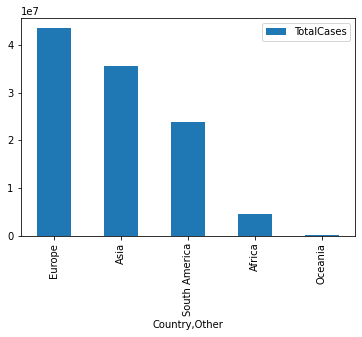

In [169]:
continent_totals_df = continents_df[['Country,Other', 'TotalCases']]
continent_totals_df.loc[:,'TotalCases'] = continent_totals_df.loc[:,'TotalCases'].astype(float)
continent_totals_df = continent_totals_df.sort_values(by=['TotalCases'],ascending=False)
continent_totals_df.plot(kind='bar', x="Country,Other", y="TotalCases")

# Let's now look at individual countries

<AxesSubplot:xlabel='Country,Other'>

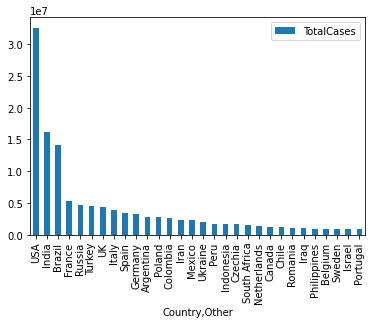

In [149]:
country_totals_df = countries_df[['Country,Other', 'TotalCases']]
country_totals_df = country_totals_df.head(30)
country_totals_df['TotalCases']=country_totals_df['TotalCases'].str.replace(',','')
country_totals_df['TotalCases'] = country_totals_df['TotalCases'].astype(float)

country_totals_df.plot(kind='bar', x="Country,Other", y="TotalCases")
